In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch.optim as optim

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# <class 'torch.Tensor'>
# <class 'int'>
# torch.Size([1, 28, 28])
# tensor(1.)
# tensor(0.)

In [3]:
l1 = torch.nn.Linear(784, 128)
l2 = torch.nn.Linear(128,10)
relu = torch.nn.ReLU(inplace = True)

In [4]:
inputs = torch.randn(100, 784)
m1 = l1(inputs)
m2 = relu(m1)
outputs = l2(m2)

print("Input Tensor:", inputs.shape)
print("Output Tensor:", outputs.shape)

Input Tensor: torch.Size([100, 784])
Output Tensor: torch.Size([100, 10])


In [5]:
inputs, outputs

(tensor([[-0.1808,  1.1692, -0.8101,  ...,  0.3146, -0.2787, -1.3479],
         [-2.0586, -0.6414, -0.9244,  ..., -0.4317, -0.4188, -3.0134],
         [ 1.7058, -0.7984,  0.6161,  ...,  0.7067, -0.3202,  0.9380],
         ...,
         [ 0.7512,  0.6937, -0.1153,  ...,  1.0000,  0.5792, -0.4815],
         [-0.2535, -0.2270, -1.3344,  ..., -0.8346, -1.5542,  1.1167],
         [-0.1407, -0.0141,  0.6386,  ...,  1.6176,  0.9334,  0.1528]]),
 tensor([[ 3.7292e-02, -1.1391e-01,  2.0513e-01, -1.7156e-01, -1.2627e-01,
          -3.0637e-02,  4.8597e-02,  4.3365e-01, -1.9469e-01, -2.3342e-01],
         [ 3.4478e-02, -3.0181e-01,  3.2601e-01, -2.6677e-01,  8.1758e-02,
           3.3510e-01,  2.9045e-01,  4.9231e-02, -5.7868e-01, -1.8980e-01],
         [-1.6246e-01, -1.0569e-01,  9.9164e-02, -4.3233e-02, -3.0786e-01,
          -4.7298e-02,  1.5217e-01,  2.9811e-02, -9.9948e-02, -3.5615e-01],
         [ 1.9316e-01,  8.9406e-02,  2.5924e-01, -3.1436e-02, -4.0402e-02,
          -8.6210e-03,  3.1042

In [6]:
net2 = torch.nn.Sequential(l1, relu, l2)
outputs2 = net2(inputs)

print("Input Tensor:", inputs.shape)
print("Output Tensor:", outputs.shape)

Input Tensor: torch.Size([100, 784])
Output Tensor: torch.Size([100, 10])


#### 4.7

In [7]:
np.random.seed(123)
x = np.random.randn(100,1)
#y는 x제곱에 난수의 10분의 1을 더한 값
y = x**2 + np.random.randn(100,1) * 0.1

x_train = x[:50,:]
x_test = x[50:,:]
y_train = y[:50,:]
y_test = y[50:,:]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


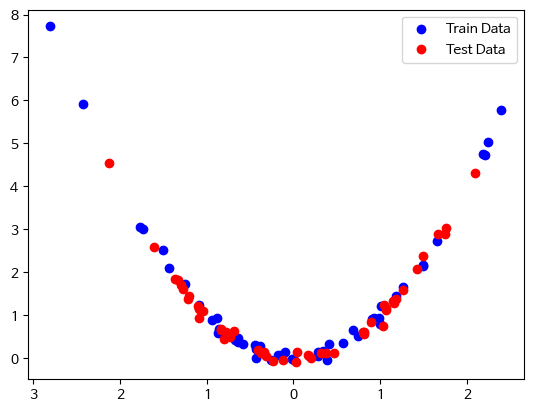

In [8]:
plt.scatter(x_train,y_train, c='b', label = 'Train Data')
plt.scatter(x_test, y_test, c='r',label='Test Data')
plt.legend()
plt.show()

In [9]:
import torch.optim as optim

W = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
B = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)

def mse(y,y_hat):
  return torch.mean((y-y_hat)**2)

def hypothesis(x):
    return W*x +B

x_train = torch.tensor(x_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
x_test = torch.tensor(x_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

In [10]:
#1. 선형함수 1개
#train
epochs = 1000
lr = 1e-6

for epoch in range(epochs):
    Yp = hypothesis(x_train)
    loss = mse(y_train, Yp)
    loss.backward()

    with torch.no_grad():
        W -= lr*W.grad
        B -= lr*B.grad

        W.grad.zero_()
        B.grad.zero_()
    if (epoch%100 == 0):
        print(f"epochs:{epoch:>.4f}, loss = {loss:>.4f}")


epochs:0.0000, loss = 4.6571
epochs:100.0000, loss = 4.6563
epochs:200.0000, loss = 4.6555
epochs:300.0000, loss = 4.6547
epochs:400.0000, loss = 4.6539
epochs:500.0000, loss = 4.6532
epochs:600.0000, loss = 4.6524
epochs:700.0000, loss = 4.6516
epochs:800.0000, loss = 4.6508
epochs:900.0000, loss = 4.6500


In [11]:
#test
Yp_test = W*x_test+B
Yp_test = Yp_test.data.numpy()

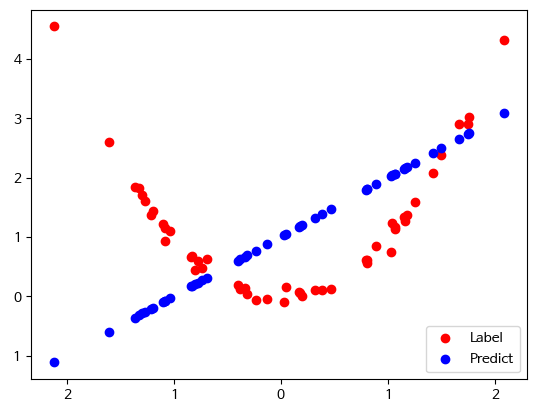

In [12]:
plt.scatter(x_test, y_test,c='r',label='Label')
plt.scatter(x_test, Yp_test, c='b',label='Predict')
plt.legend()
plt.show()

In [13]:
W1 = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
W2 = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
B = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)

def mse(y,y_hat):
  return torch.mean((y-y_hat)**2)

def hypothesis(x):
    return W1*(x**2)+ W2*x +B

x_train = torch.tensor(x_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
x_test = torch.tensor(x_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)


epochs = 1000
lr = 1e-6

for epoch in range(epochs):
    Yp = hypothesis(x_train)
    loss = mse(y_train, Yp)
    loss.backward()

    with torch.no_grad():
        W1 -= lr*W1.grad
        W2 -= lr*W2.grad
        B -= lr*B.grad

        W1.grad.zero_()
        W2.grad.zero_()
        B.grad.zero_()
    if (epoch%100 == 0):
        print(f"epochs:{epoch:>.4f}, loss = {loss:>.4f}")

<ipython-input-13-b4a9b3a997e0>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype = torch.float32)
<ipython-input-13-b4a9b3a997e0>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype = torch.float32)
<ipython-input-13-b4a9b3a997e0>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype = torch.float32)
<ipython-input-13-b4a9b3a997e0>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach(

epochs:0.0000, loss = 2.4404
epochs:100.0000, loss = 2.4383
epochs:200.0000, loss = 2.4361
epochs:300.0000, loss = 2.4340
epochs:400.0000, loss = 2.4319
epochs:500.0000, loss = 2.4297
epochs:600.0000, loss = 2.4276
epochs:700.0000, loss = 2.4254
epochs:800.0000, loss = 2.4233
epochs:900.0000, loss = 2.4212


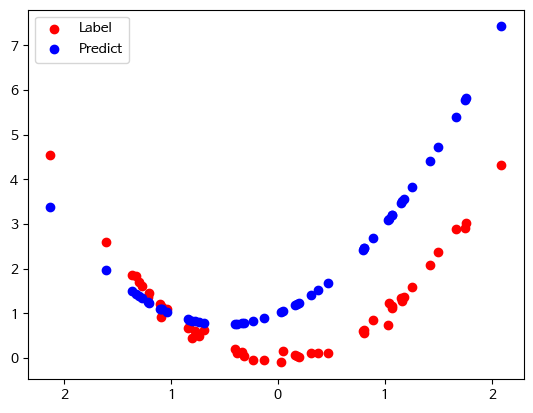

In [14]:
Yp_test = W1*(x_test**2) + W2*x_test +B
Yp_test = Yp_test.data.numpy()
plt.scatter(x_test, y_test,c='r',label='Label')
plt.scatter(x_test, Yp_test, c='b',label='Predict')
plt.legend()
plt.show()

iter:1, loss = 1.9309
iter:2, loss = 1.9805
iter:3, loss = 2.1476
iter:4, loss = 2.2030
iter:5, loss = 2.2019
iter:6, loss = 2.1287
iter:7, loss = 2.0846
iter:8, loss = 1.8621
iter:9, loss = 1.8551
iter:10, loss = 1.9665


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


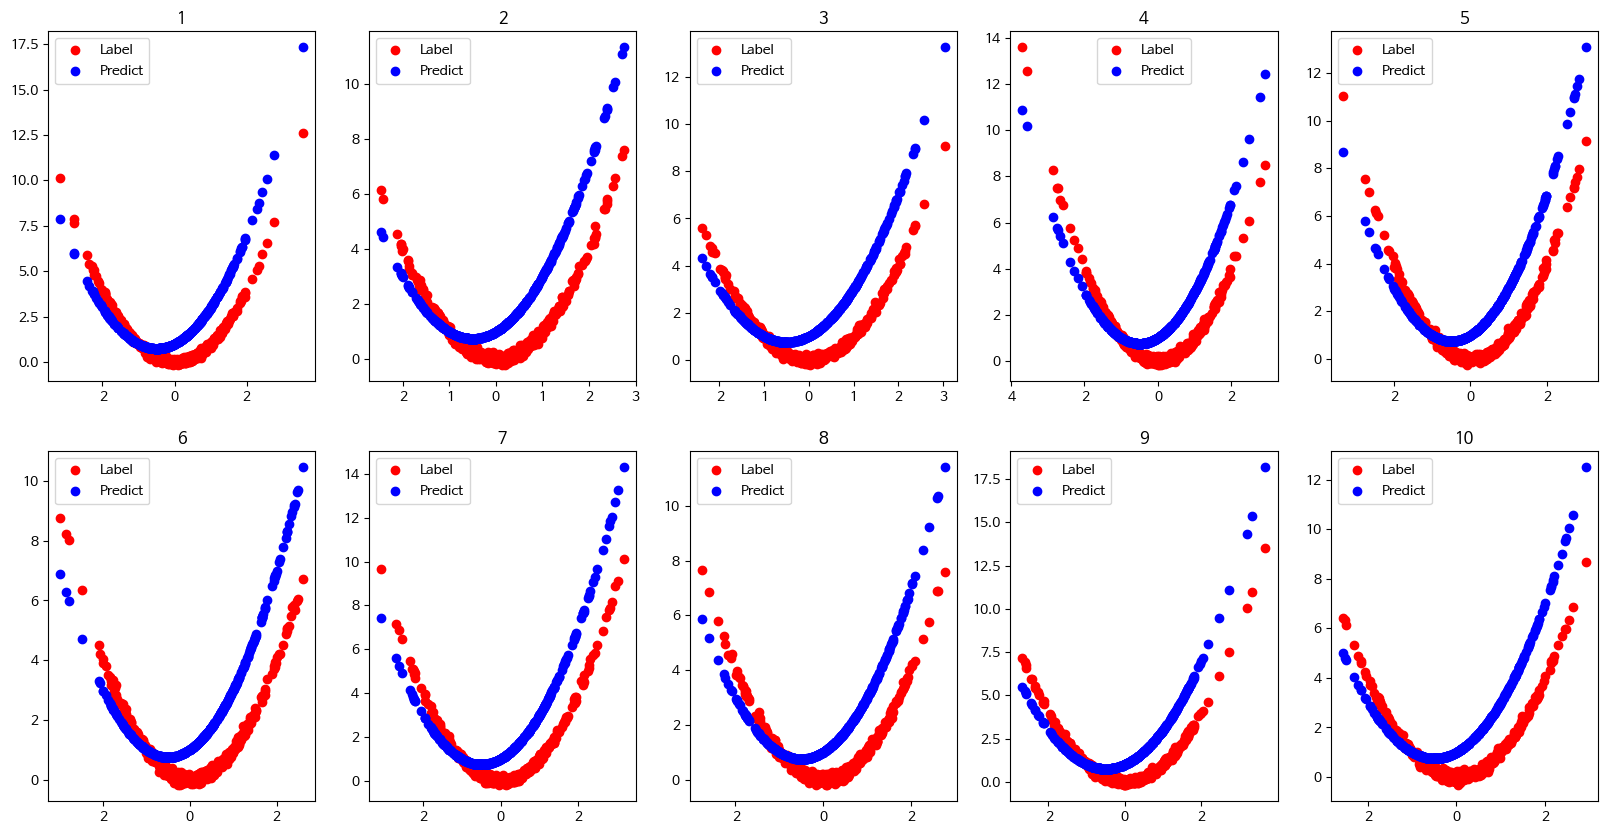

In [15]:
plt.figure(figsize=(20,10))
for i in range(1,11):
    x = np.random.randn(1000,1)
    #y는 x제곱에 난수의 10분의 1을 더한 값
    y = x**2 + np.random.randn(1000,1) * 0.1

    x_train = x[:500,:]
    x_test = x[500:,:]
    y_train = y[:500,:]
    y_test = y[500:,:]

    x_train = torch.tensor(x_train, dtype = torch.float32)
    y_train = torch.tensor(y_train, dtype = torch.float32)
    x_test = torch.tensor(x_test, dtype = torch.float32)
    y_test = torch.tensor(y_test, dtype = torch.float32)

    W1 = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
    W2 = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
    B = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)

    def mse(y,y_hat):
        return torch.mean((y-y_hat)**2)

    def hypothesis(x):
        return W1*(x**2)+ W2*x +B


    epochs = 5
    lr = 1e-6

    for epoch in range(epochs):
        Yp = hypothesis(x_train)
        loss = mse(y_train, Yp)
        loss.backward()

        with torch.no_grad():
            W1 -= lr*W1.grad
            W2 -= lr*W2.grad
            B -= lr*B.grad

            W1.grad.zero_()
            W2.grad.zero_()
            B.grad.zero_()
    else:
        print(f"iter:{i}, loss = {loss:>.4f}")

    Yp_test = W1*(x_test**2) + W2*x_test +B
    Yp_test = Yp_test.data.numpy()
    plt.subplot(2,5,i)
    plt.scatter(x_test, y_test,c='r',label='Label')
    plt.scatter(x_test, Yp_test, c='b',label='Predict')
    plt.legend()
    plt.title(i)






In [16]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

<ipython-input-16-752f982fcb16>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(x_train).float()
<ipython-input-16-752f982fcb16>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train).float()
<ipython-input-16-752f982fcb16>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_test = torch.tensor(x_test).float()
<ipython-input-16-752f982fcb16>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_gr

In [17]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 1)
    def forward(self, x):
        x1 = self.l1(x)
        return x1

lr = 1e-6
net = Net()
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss()
num_epochs = 10000
history = np.zeros((0,2))

In [18]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    if ( epoch % 1000 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 3.85110
Epoch 1000 loss: 3.84323
Epoch 2000 loss: 3.83537
Epoch 3000 loss: 3.82752
Epoch 4000 loss: 3.81970
Epoch 5000 loss: 3.81190
Epoch 6000 loss: 3.80419
Epoch 7000 loss: 3.79650
Epoch 8000 loss: 3.78881
Epoch 9000 loss: 3.78115


In [19]:
#Net2
class Net2(nn.Module):
    def __init__(self):
        super().__init__()

        self.l1 = nn.Linear(1,10)
        self.l2 = nn.Linear(10,10)
        self.l3 = nn.Linear(10,1)

    def forward(self,x):
        x1 = self.l1(x)
        x2 = self.l2(x1)
        x3 = self.l3(x2)
        return x3

In [20]:
lr = 0.01

net2 = Net2()

optimizer = optim.SGD(net2.parameters(), lr=lr)

criterion = nn.MSELoss()

num_epochs = 10000

history = np.zeros((0,2))

In [21]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net2(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch%500 == 0):
        history = np.vstack((history, np.array([epochs, loss.item()])))
        print(f"Epoch: {epoch:>.5f}, loss : {loss.item():>.5f}")

Epoch: 0.00000, loss : 2.02751
Epoch: 500.00000, loss : 1.87035
Epoch: 1000.00000, loss : 1.87035
Epoch: 1500.00000, loss : 1.87035
Epoch: 2000.00000, loss : 1.87035
Epoch: 2500.00000, loss : 1.87035
Epoch: 3000.00000, loss : 1.87035
Epoch: 3500.00000, loss : 1.87035
Epoch: 4000.00000, loss : 1.87035
Epoch: 4500.00000, loss : 1.87035
Epoch: 5000.00000, loss : 1.87035
Epoch: 5500.00000, loss : 1.87035
Epoch: 6000.00000, loss : 1.87035
Epoch: 6500.00000, loss : 1.87035
Epoch: 7000.00000, loss : 1.87035
Epoch: 7500.00000, loss : 1.87035
Epoch: 8000.00000, loss : 1.87035
Epoch: 8500.00000, loss : 1.87035
Epoch: 9000.00000, loss : 1.87035
Epoch: 9500.00000, loss : 1.87035


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


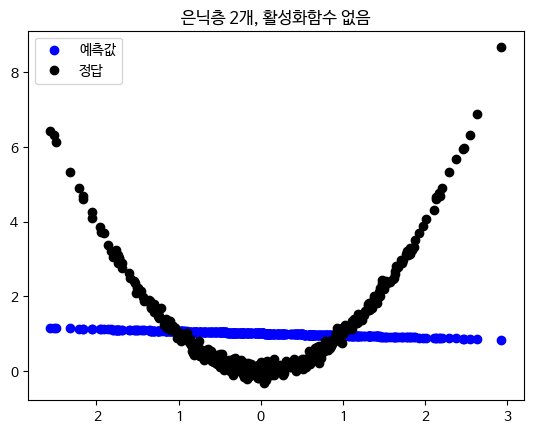

In [22]:
labels_pred2 = net2(inputs_test)

plt.title('은닉층 2개, 활성화함수 없음')
plt.scatter(inputs_test[:,0].data, labels_pred2[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', label='정답')
plt.legend()
plt.show()

In [23]:
#net3

class Net3(nn.Module):
    def __init__(self):
        super().__init__()

        self.l1 = nn.Linear(1,10)
        self.l2 = nn.Linear(10,10)
        self.l3 = nn.Linear(10,1)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3


In [24]:
net3 = Net3()
optimizer = optim.SGD(net3.parameters(), lr=lr)
criterion = nn.MSELoss()

lr = 0.01
num_epochs = 10000
history = np.zeros((0,2))

In [25]:
for epoch in range(1,num_epochs+1):
    optimizer.zero_grad()
    outputs = net3(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()


    if (epoch%500 == 0):
        history = np.vstack((history, np.array([epochs, loss.item()])))
        print(f"Epoch: {epoch:>.5f}, loss : {loss.item():>.5f}")



Epoch: 500.00000, loss : 0.13380
Epoch: 1000.00000, loss : 0.03955
Epoch: 1500.00000, loss : 0.03030
Epoch: 2000.00000, loss : 0.02748
Epoch: 2500.00000, loss : 0.02605
Epoch: 3000.00000, loss : 0.02499
Epoch: 3500.00000, loss : 0.02411
Epoch: 4000.00000, loss : 0.02332
Epoch: 4500.00000, loss : 0.02260
Epoch: 5000.00000, loss : 0.02197
Epoch: 5500.00000, loss : 0.02141
Epoch: 6000.00000, loss : 0.02090
Epoch: 6500.00000, loss : 0.02042
Epoch: 7000.00000, loss : 0.02000
Epoch: 7500.00000, loss : 0.01960
Epoch: 8000.00000, loss : 0.01922
Epoch: 8500.00000, loss : 0.01883
Epoch: 9000.00000, loss : 0.01846
Epoch: 9500.00000, loss : 0.01810
Epoch: 10000.00000, loss : 0.01771


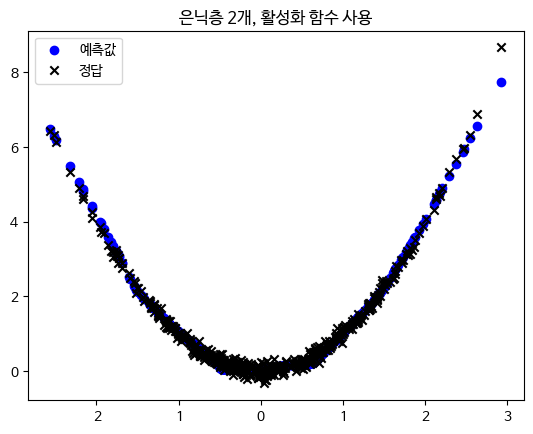

In [26]:
labels_pred3 = net3(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용')
plt.scatter(inputs_test[:,0].data, labels_pred3[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()